Descriptive Statistics	– 					
Measures of Central Tendency and variability Perform the following operations on any open source dataset (e.g., employee_2.csv/data.csv) 
1.Provide summary statistics (maximum, standard deviation, covaiance) for a dataset (age, salary etc.) with numeric variables 
2. Grouped by one of the qualitative (categorical) variable. For example, if your categorical variable is age groups and quantitative variable is income, then provide summary statistics of income grouped by the age groups. 
Create a list that contains a numeric value for each response to the categorical variable. 
3. Perform grouping on and display JOB_ID and it's count
4.Show data visualization for any column

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv("C:\\Users\\DELL\\Downloads\\Employee_2.csv")
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,Salary
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0,171369.0
1,Bachelors,2013,Pune,1,28,Female,No,3,1,136993.0
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0,113807.0
3,Masters,2016,Bangalore,3,27,Male,No,5,1,166478.0
4,Masters,2017,NaN,3,24,Male,Yes,2,1,393136.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1807 entries, 0 to 1806
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Education                  1807 non-null   object 
 1   JoiningYear                1807 non-null   int64  
 2   City                       1793 non-null   object 
 3   PaymentTier                1807 non-null   int64  
 4   Age                        1807 non-null   int64  
 5   Gender                     1799 non-null   object 
 6   EverBenched                1807 non-null   object 
 7   ExperienceInCurrentDomain  1807 non-null   int64  
 8   LeaveOrNot                 1807 non-null   int64  
 9   Salary                     1798 non-null   float64
dtypes: float64(1), int64(5), object(4)
memory usage: 141.3+ KB


In [9]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot,Salary
count,1807.000000,1807.000000,1807.000000,1807.000000,1807.000000,1798.000000
mean,2015.076923,2.695075,26.310459,3.228002,0.362479,224240.323693
std,1.854077,0.564248,2.142854,1.302112,0.480849,100823.365853
min,2012.000000,1.000000,22.000000,0.000000,0.000000,50135.000000
25%,2013.000000,2.000000,25.000000,2.000000,0.000000,137712.250000
50%,2015.000000,3.000000,26.000000,3.000000,0.000000,226605.500000
75%,2017.000000,3.000000,27.000000,4.000000,1.000000,309474.000000
max,2018.000000,3.000000,40.000000,5.000000,1.000000,399785.000000


In [11]:
summary_stats=df[['Age','Salary']].agg(['max','std'])
print("Summary_stats")
print(summary_stats)

Summary_stats
           Age         Salary
max  40.000000  399785.000000
std   2.142854  100823.365853


In [13]:
print("covaiance between Age and Salary")
print(df[['Age','Salary']].cov())

covaiance between Age and Salary
                Age        Salary
Age        4.591823 -4.897130e+03
Salary -4897.130103  1.016535e+10


In [25]:
grouped=df.groupby('Age')['Salary'].agg(['mean','max','std','count'])
print("Grouped Summary by Age")
print(grouped)

Grouped Summary by Age
              mean       max            std  count
Age                                               
22   259058.600000  354908.0   73658.788337      5
23   172689.250000  397163.0  112452.768214      8
24   222827.977564  394285.0   99400.116322    312
25   229309.074928  399598.0   97516.664782    347
26   230405.732591  399785.0  102718.758999    359
27   216327.515670  397692.0   98736.031960    351
28   221632.525281  396967.0  104729.653936    356
29   292121.166667  375674.0   94052.511319      6
30   251757.000000  359793.0   78752.689982      8
31   258535.666667  389566.0  116893.761581      6
32   212494.250000  324620.0  122837.149523      4
34   262236.333333  375917.0   99004.633256      9
35   314413.000000  314413.0            NaN      1
36   203788.666667  397693.0  129564.655117      6
37   221863.666667  357586.0  122370.314156      6
38   176202.400000  364676.0  113004.601366      5
39   215869.400000  347303.0   78818.608097      5
40   127

In [19]:
df['Age_encoded']=df['Age'].astype('category').cat.codes
print("Numeric encoding of age")
print(df[['Age','Age_encoded']].drop_duplicates())

Numeric encoding of age
    Age  Age_encoded
0    34           11
1    28            6
2    38           15
3    27            5
4    24            2
5    22            0
8    23            1
9    37           14
12   32           10
13   39           16
15   29            7
18   30            8
22   36           13
28   31            9
30   25            3
32   26            4
33   40           17
47   35           12


In [27]:
gender_counts=df["Gender"].value_counts()
print("Gender Counts")
print(gender_counts)

Gender Counts
Gender
Male      1071
Female     728
Name: count, dtype: int64


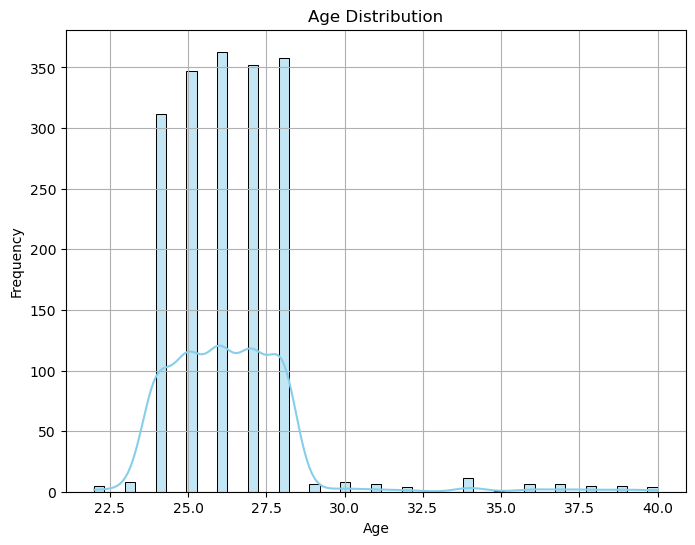

In [37]:
plt.figure(figsize=(8,6))
sns.histplot(df['Age'],kde=True,color='skyblue')
plt.title("Age Distribution")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid()
plt.show()